**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [10]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5, 0, 'exogenous')

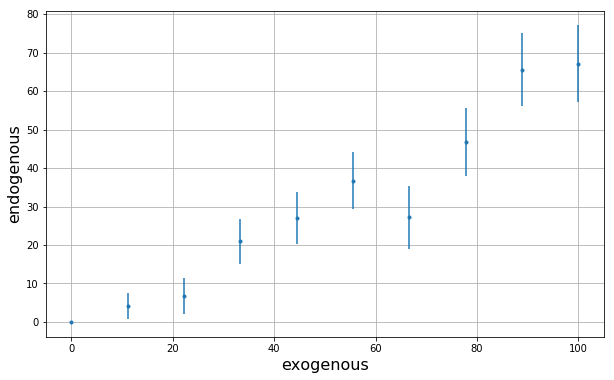

In [47]:
# generate x and y values 
x, y = np.linspace(0, 100, 10), line(0.6, np.linspace(0, 100, 10), errors=errors)
# plot the error bar 
plt.figure(figsize=(10,6))
plt.grid(b=True)
pl.errorbar(x, y, errors(x),  fmt='.')
pl.ylabel("endogenous", fontsize=16)
pl.xlabel("exogenous", fontsize=16)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [21]:
print("The x values are : ", x)

The x values are :  [  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]


In [22]:
print("The y values are : ", y)

The y values are :  [ 0.          9.26876507 20.48912781 15.20810076 28.61600508 26.00447978
 27.72431849 34.67419791 59.86474065 54.63985632]


In [23]:
x_constant = sm.add_constant(x)

In [24]:
print("After adding constant: ", x_constant)

After adding constant:  [[  1.           0.        ]
 [  1.          11.11111111]
 [  1.          22.22222222]
 [  1.          33.33333333]
 [  1.          44.44444444]
 [  1.          55.55555556]
 [  1.          66.66666667]
 [  1.          77.77777778]
 [  1.          88.88888889]
 [  1.         100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [25]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.66e-08
Time:                        13:31:04   Log-Likelihood:                -32.517
No. Observations:                  10   AIC:                             67.03
Df Residuals:                       9   BIC:                             67.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5432      0.035     15.462      0.000       0.464       0.623
==============================================================================
Omnibus:                        0.389   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.475
Skew:                           0.231   Prob(JB):                        0.788
Kurtosis:                       2.037   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#THE RIGHT WAY
smfit_with_constants = smf.OLS(y, x_constant).fit()
smfit_with_constants.summary()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     57.41
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.44e-05
Time:                        13:32:03   Log-Likelihood:                -32.410
No. Observations:                  10   AIC:                             68.82
Df Residuals:                       8   BIC:                             69.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6910      4.064      0.416      0.688      -7.681      11.063
x1             0.5192      0.069      7.577      0.000       0.361       0.677
==============================================================================
Omnibus:                        0.573   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.529
Skew:                           0.422   Prob(JB):                        0.767
Kurtosis:                       2.253   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

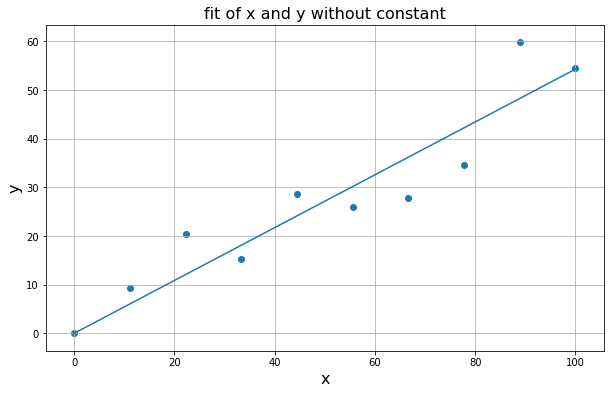

In [39]:
# first plot the one without constant
plt.figure(figsize=(10,6))
plt.title('fit of x and y without constant', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(b=True)
pred = smfit.predict(x) 
plt.plot(x, pred)
plt.scatter(x, y)

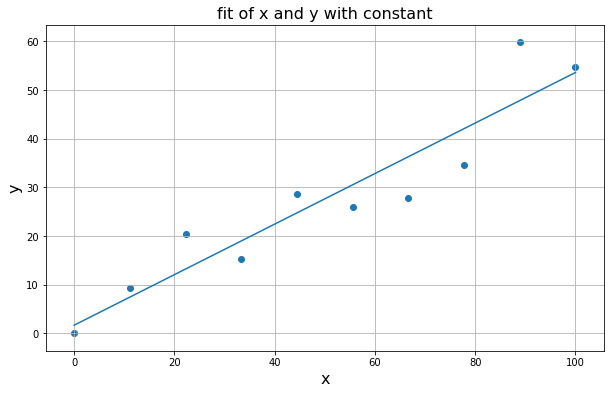

In [41]:
# first get the slope and constant 
p1, p2 = smfit_with_constants.params
plt.figure(figsize=(10,6))
plt.title('fit of x and y with constant', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(b=True)
pred = smfit.predict(x) 
plt.plot(x, x * p2 + p1)
plt.scatter(x, y)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5, 0, 'exogenous')

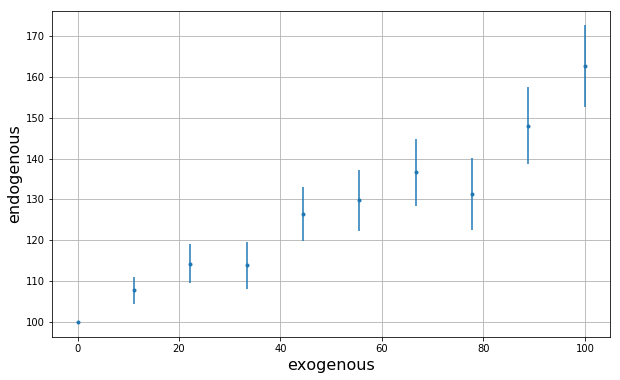

In [48]:
# generate x and y values 
x, y = np.linspace(0, 100, 10), line(0.6, np.linspace(0, 100, 10), b=100, errors=errors)
# plot the error bar 
plt.figure(figsize=(10,6))
plt.grid(b=True)
pl.errorbar(x, y, errors(x),  fmt='.')
pl.ylabel("endogenous", fontsize=16)
pl.xlabel("exogenous", fontsize=16)

# 6. repeat step 3

In [49]:
# without constants
smfit = smf.OLS(y, x).fit()
smfit.summary()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     42.12
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000113
Time:                        14:38:25   Log-Likelihood:                -54.053
No. Observations:                  10   AIC:                             110.1
Df Residuals:                       9   BIC:                             110.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9642      0.303      6.490      0.000       1.280       2.649
==============================================================================
Omnibus:                        1.595   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                0.758
Skew:                           0.074   Prob(JB):                        0.685
Kurtosis:                       1.660   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# with constants 
smfit_with_constants = smf.OLS(y, x_constant).fit()
smfit_with_constants.summary()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.45e-06
Time:                        14:38:49   Log-Likelihood:                -29.566
No. Observations:                  10   AIC:                             63.13
Df Residuals:                       8   BIC:                             63.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7326      3.058     32.613      0.000      92.681     106.785
x1             0.5470      0.052     10.609      0.000       0.428       0.666
==============================================================================
Omnibus:                        4.763   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                1.359
Skew:                          -0.762   Prob(JB):                        0.507
Kurtosis:                       3.969   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [51]:
# using sm.wls
sm.WLS(y, x, weights=1/errors(y)).fit().summary()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            WLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     38.08
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000165
Time:                        14:42:19   Log-Likelihood:                -54.378
No. Observations:                  10   AIC:                             110.8
Df Residuals:                       9   BIC:                             111.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9892      0.322      6.171      0.000       1.260       2.718
==============================================================================
Omnibus:                        1.455   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                0.748
Skew:                           0.146   Prob(JB):                        0.688
Kurtosis:                       1.693   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

In [ ]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();